In [14]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [12]:
x=np.array([[1.0,1.0],[1.5,2.0],[3.0,4.0],[5.0,7.0],[3.5,5.0],[4.5,5.0]])
y=np.array(['A','A','B','B','B','B'])

In [16]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [18]:
new_point=np.array([[2.0,3.0]])
predicted_class=knn.predict(new_point)

In [20]:
print('The predicted class is:',predicted_class[0])

The predicted class is: A


In [22]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

In [24]:
df=pd.read_csv('cardata.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [26]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder as LE

In [38]:
encoded_df = pd.get_dummies(df, columns=["Car_Name","Fuel_Type","Seller_Type","Transmission"])

In [40]:
print(encoded_df)

     Year  Selling_Price  Present_Price  Kms_Driven  Owner  Car_Name_800  \
0    2014           3.35           5.59       27000      0         False   
1    2013           4.75           9.54       43000      0         False   
2    2017           7.25           9.85        6900      0         False   
3    2011           2.85           4.15        5200      0         False   
4    2014           4.60           6.87       42450      0         False   
..    ...            ...            ...         ...    ...           ...   
296  2016           9.50          11.60       33988      0         False   
297  2015           4.00           5.90       60000      0         False   
298  2009           3.35          11.00       87934      0         False   
299  2017          11.50          12.50        9000      0         False   
300  2016           5.30           5.90        5464      0         False   

     Car_Name_Activa 3g  Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  \
0               

In [44]:
x=encoded_df.drop("Owner",axis=1).values
y=encoded_df["Owner"].values

In [46]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [56]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix

In [64]:
cm=confusion_matrix(y_test,y_pred)

In [66]:
cm

array([[89,  0],
       [ 2,  0]], dtype=int64)

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

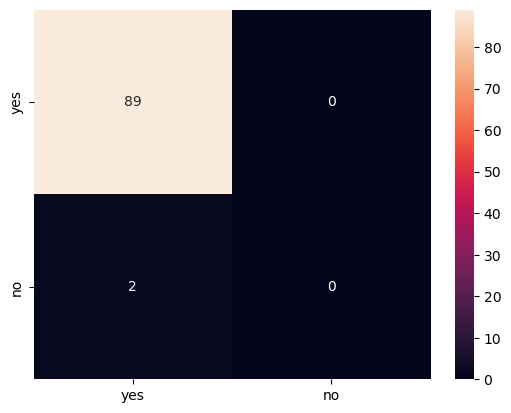

In [78]:
sns.heatmap(cm,
           annot=True,
           fmt="g",
           xticklabels=["yes","no"],
           yticklabels=["yes","no"])
plt.xlabel=("actual")
plt.ylabel=("predict")
plt.title=("Car Data")
plt.show()

In [80]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [82]:
ratings = np.array([
    [5, 4, 3, 0, 2],
    [4, 0, 5, 3, 2],
    [3, 5, 4, 2, 1],
    [0, 3, 4, 5, 2]
])

In [84]:
knn = NearestNeighbors(n_neighbors=2, metric='cosine')
knn.fit(ratings)

NearestNeighbors(metric='cosine', n_neighbors=2)

In [86]:
distances, indices = knn.kneighbors([ratings[0]])
print("Similar Users to User 0:", indices)

Similar Users to User 0: [[0 2]]


In [88]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [90]:
digits = load_digits()
X, y = digits.data, digits.target

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [96]:
y_pred = knn.predict(X_test)
print("Digit Classification Accuracy:", accuracy_score(y_test, y_pred))

Digit Classification Accuracy: 0.9861111111111112


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
iris = load_iris()
X, y = iris.data, iris.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [20]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [22]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [34]:
data = load_breast_cancer()
X, y = data.data, data.target

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Breast Cancer Classification Accuracy: {accuracy:.2f}')

Breast Cancer Classification Accuracy: 0.95


In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [46]:
X = np.array([[120, 60, 80], [130, 55, 75], [140, 80, 60], [90, 40, 90], [110, 70, 50]])
y = np.array(['Pop', 'Pop', 'Rock', 'Jazz', 'Rock'])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Music Genre Classification Accuracy: {accuracy:.2f}')

Music Genre Classification Accuracy: 0.00


In [56]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [58]:
texts = [
    "I love this product!", "Worst experience ever", "It was okay, not great",
    "Amazing customer service!", "This is terrible", "I feel happy using this",
]
labels = ["Positive", "Negative", "Neutral", "Positive", "Negative", "Positive"]

In [60]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [64]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Sentiment Analysis Accuracy: {accuracy:.2f}')

Sentiment Analysis Accuracy: 0.50


In [68]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [70]:
news = [
    "Breaking: Scientists discover a new planet!", 
    "Celebrity spotted with an alien", 
    "Government launches new healthcare policy",
    "Fake cure for cancer exposed!", 
    "Politician involved in corruption scandal"
]
labels = ["Real", "Fake", "Real", "Fake", "Real"]

In [72]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(news)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [76]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [78]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Fake News Detection Accuracy: {accuracy:.2f}')

Fake News Detection Accuracy: 0.00


In [80]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [82]:
X = np.array([[100, 3, 2], [5000, 50, 1], [200, 2, 5], [7000, 100, 0], [50, 1, 10]])
y = np.array(["Legit", "Fraud", "Legit", "Fraud", "Legit"])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [90]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Fraud Detection Accuracy: {accuracy:.2f}')

Fraud Detection Accuracy: 0.00


In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [94]:
digits = load_digits()
X, y = digits.data, digits.target

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [102]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Handwriting Recognition Accuracy: {accuracy:.2f}')

Handwriting Recognition Accuracy: 0.97


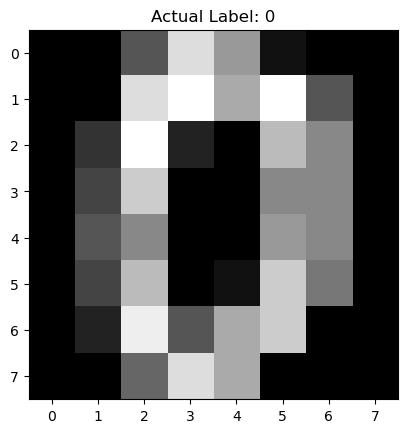

In [104]:
plt.imshow(digits.images[0], cmap='gray')
plt.title(f'Actual Label: {digits.target[0]}')
plt.show()
